In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
import torch.nn.functional as F
import tqdm
from tqdm import tnrange
from imblearn.over_sampling import SMOTE


/home/mainak09/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/mainak09/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df=pd.read_csv('winequality-red.csv')

In [5]:
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [7]:
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [8]:
split_data = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";")

data = split_data.to_list()

names = ["Fixed_acidity", "Volatile_acidity", "Citric_acid", "Residual_sugar", "Chlorides", "Free_sulfur_dioxide", "Total_sulfur_Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]

df2 = pd.DataFrame(data, columns=names)

In [9]:
df2.head()

,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


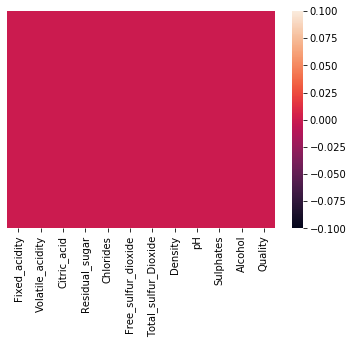

In [10]:
sn.heatmap(df2.isnull(), yticklabels=False)

In [11]:
df2.isnull().values.any() # no null values

False

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fixed_acidity         1599 non-null   object
 1   Volatile_acidity      1599 non-null   object
 2   Citric_acid           1599 non-null   object
 3   Residual_sugar        1599 non-null   object
 4   Chlorides             1599 non-null   object
 5   Free_sulfur_dioxide   1599 non-null   object
 6   Total_sulfur_Dioxide  1599 non-null   object
 7   Density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   Sulphates             1599 non-null   object
 10  Alcohol               1599 non-null   object
 11  Quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [13]:
df3 = df2.astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed_acidity         1599 non-null   float64
 1   Volatile_acidity      1599 non-null   float64
 2   Citric_acid           1599 non-null   float64
 3   Residual_sugar        1599 non-null   float64
 4   Chlorides             1599 non-null   float64
 5   Free_sulfur_dioxide   1599 non-null   float64
 6   Total_sulfur_Dioxide  1599 non-null   float64
 7   Density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   Sulphates             1599 non-null   float64
 10  Alcohol               1599 non-null   float64
 11  Quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


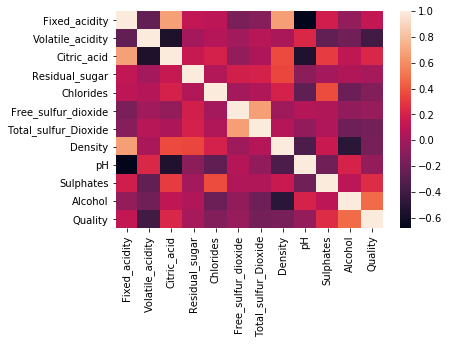

In [14]:
# corr matrix
sn.heatmap(df3.corr())
plt.show()

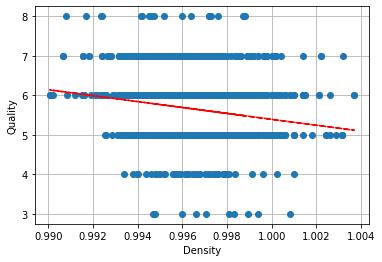

In [15]:
attribute="Density"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

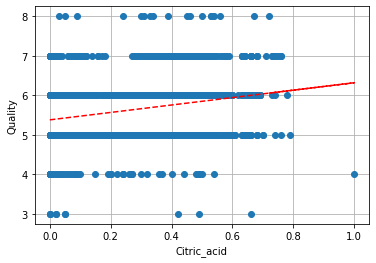

In [16]:
attribute="Citric_acid"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

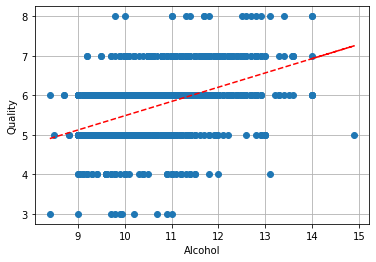

In [17]:
attribute="Alcohol"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

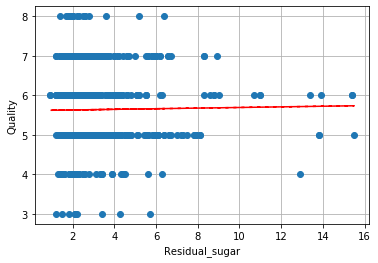

In [18]:
attribute="Residual_sugar"
x = list(df3[attribute])
y = list(df3['Quality'])
y, x = zip(*sorted(zip(y, x)))
plt.plot(x,y,'o')
plt.xlabel(attribute)
plt.xticks()
plt.ylabel('Quality')
plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [223]:
# Scale

quality_backup = df3["Quality"]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)
df_scaled['Quality'] = quality_backup #restore quality values
df_scaled.head()


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5.0


In [224]:
df_scaled["Quality"].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: Quality, dtype: int64

In [225]:
max_size = df_scaled['Quality'].value_counts().max()


lst = [train]
for class_index, group in df_scaled.groupby('Quality'):
    lst.append(group.sample(max_size-len(group), replace=True))
frame_new = pd.concat(lst)


In [233]:
df_scaled2=frame_new
df_scaled2["Quality"].value_counts()

8.0    678
3.0    677
4.0    671
7.0    660
6.0    555
5.0    546
Name: Quality, dtype: int64

In [262]:
df_scaled2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 0 to 1061
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed_acidity         3787 non-null   float64
 1   Volatile_acidity      3787 non-null   float64
 2   Citric_acid           3787 non-null   float64
 3   Residual_sugar        3787 non-null   float64
 4   Chlorides             3787 non-null   float64
 5   Free_sulfur_dioxide   3787 non-null   float64
 6   Total_sulfur_Dioxide  3787 non-null   float64
 7   Density               3787 non-null   float64
 8   pH                    3787 non-null   float64
 9   Sulphates             3787 non-null   float64
 10  Alcohol               3787 non-null   float64
 11  Quality               3787 non-null   float64
dtypes: float64(12)
memory usage: 384.6 KB


In [238]:
train = df_scaled2.iloc[:3487]
val = df_scaled2.iloc[3487:3587]
test = df_scaled2.iloc[3587:]


In [239]:
train["Quality"].value_counts()
#almost balanced

3.0    677
4.0    671
7.0    660
6.0    555
5.0    546
8.0    378
Name: Quality, dtype: int64

In [241]:
#Split.

X_train, y_train= train.drop('Quality', axis=1), train['Quality']
print(X_train.shape)

X_val, y_val = val.drop('Quality', axis=1), val['Quality']
print(X_val.shape)

X_test, y_test = test.drop("Quality", axis=1), test["Quality"]


(3487, 11)
(100, 11)


In [242]:
print(len(X_train))

3487


In [243]:
f=7

train_batch = np.array_split(X_train, f) 
label_batch = np.array_split(y_train, f) # 50 sections/batches

val_batch = np.array_split(X_val, f)
val_label_batch = np.array_split(y_val, f)

test_batch = np.array_split(X_test,f) 
test_label_batch  = np.array_split(y_test, f)

In [244]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)
    
for i in range(len(val_batch)):
    val_batch[i] = torch.from_numpy(val_batch[i].values).float()
for i in range(len(val_label_batch)):
    val_label_batch[i] = torch.from_numpy(val_label_batch[i].values).float().view(-1, 1)
    
    
    
for i in range(len(test_batch)):
    test_batch[i] = torch.from_numpy(test_batch[i].values).float()
for i in range(len(test_label_batch)):
    test_label_batch[i] = torch.from_numpy(test_label_batch[i].values).float().view(-1, 1)
    
    
    

In [245]:
print(len(train_batch[0]))
print(len(label_batch))
print(len(val_batch))
print(len(val_label_batch))
print(len(train_batch[0][0]))

499
7
7
7
11


In [246]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(11, 22)
        self.fc2 = nn.Linear(22, 44)
        self.fc3 = nn.Linear(44, 20)
        self.fc4 = nn.Linear(20, 10)
        self.fc5 = nn.Linear(10, 1)
       
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))

        return x

### Notes:

1. optimizer.zero_grad() PyTorch's autograd simply accumulates the gradients for each model parameter. Thus for each epoch, one has to clear the existing gradients.

2. loss.backward() does the backward pass of the model and accumulates the gradients for each model parameter.

3. optimizer.step() computes the weight update for each model parameter and applies them.

In [252]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 1000
train_losses, val_losses = [], []


scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')


for e in tnrange(epochs):
    
    model.train()
    train_loss = 0
    val_loss_1=0
    val_loss_sum = 0
    
    for i in range(len(train_batch)):
        
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = criterion(output, label_batch[i])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
        with torch.no_grad():
            
            for j in range(len(val_batch)):
                
                val_output = model(val_batch[j])
                val_loss =  criterion(val_output, val_label_batch[j])
                val_loss_1+=val_loss.item()
        val_loss_sum=val_loss_1/len(val_batch)
        
        
    print("Epoch :", e, "train_loss :", train_loss/len(train_batch), "Val loss: ", val_loss_sum/len(val_batch))    
    val_losses.append(val_loss_sum/len(val_batch))    
    train_losses.append(train_loss/len(train_batch))
    

/home/mainak09/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # This is added back by InteractiveShellApp.init_path()


Epoch : 0 train_loss : 27.1056718145098 Val loss:  57.73813979479731
Epoch : 1 train_loss : 15.510206631251744 Val loss:  35.466824025523906
Epoch : 2 train_loss : 6.768527984619141 Val loss:  2.940059067339313
Epoch : 3 train_loss : 3.7974042764731815 Val loss:  10.887306018751493
Epoch : 4 train_loss : 3.1879988440445493 Val loss:  10.30095505227848
Epoch : 5 train_loss : 3.1213358555521284 Val loss:  4.301196871971597
Epoch : 6 train_loss : 2.9451657959393094 Val loss:  5.873987898534658
Epoch : 7 train_loss : 2.4840630122593472 Val loss:  6.4815176749716
Epoch : 8 train_loss : 2.4163797923496793 Val loss:  4.398390336912505
Epoch : 9 train_loss : 2.3217916829245433 Val loss:  4.479832746544663
Epoch : 10 train_loss : 2.0798545394624983 Val loss:  4.43426632394596
Epoch : 11 train_loss : 1.9908232263156347 Val loss:  3.554568426949637
Epoch : 12 train_loss : 1.8827957681247167 Val loss:  3.391835996082851
Epoch : 13 train_loss : 1.746308650289263 Val loss:  3.1190710092077447
Epoch 

Epoch : 115 train_loss : 0.9010505080223083 Val loss:  0.7290881890423444
Epoch : 116 train_loss : 0.8943109512329102 Val loss:  0.7467149292327919
Epoch : 117 train_loss : 0.9003643478666034 Val loss:  0.7384708392985013
Epoch : 118 train_loss : 0.8935555815696716 Val loss:  0.7458655083057832
Epoch : 119 train_loss : 0.8963864701134818 Val loss:  0.7550690566398659
Epoch : 120 train_loss : 0.889728707926614 Val loss:  0.7214711722062558
Epoch : 121 train_loss : 0.8901969875608172 Val loss:  0.7567949693421928
Epoch : 122 train_loss : 0.8925953081675938 Val loss:  0.7159369496666655
Epoch : 123 train_loss : 0.8815710374287197 Val loss:  0.7470418366850639
Epoch : 124 train_loss : 0.8910520076751709 Val loss:  0.7295526284344342
Epoch : 125 train_loss : 0.8794522370610919 Val loss:  0.7229119171293414
Epoch : 126 train_loss : 0.8854060769081116 Val loss:  0.7457189991766092
Epoch : 127 train_loss : 0.8831198811531067 Val loss:  0.7147474532224694
Epoch : 128 train_loss : 0.876626116888

Epoch : 234 train_loss : 0.8065887434141976 Val loss:  0.6187370979056066
Epoch : 235 train_loss : 0.7904945015907288 Val loss:  0.64843414602231
Epoch : 236 train_loss : 0.8100443226950509 Val loss:  0.6396258668023712
Epoch : 237 train_loss : 0.7956269553729466 Val loss:  0.6214170611026335
Epoch : 238 train_loss : 0.8016813184533801 Val loss:  0.6598490887150472
Epoch : 239 train_loss : 0.8059813891138349 Val loss:  0.6170915416917022
Epoch : 240 train_loss : 0.7892164673124041 Val loss:  0.6333237740458274
Epoch : 241 train_loss : 0.8066091580050332 Val loss:  0.6447943756166769
Epoch : 242 train_loss : 0.8015888673918588 Val loss:  0.6245915138599825
Epoch : 243 train_loss : 0.7916934064456395 Val loss:  0.6418279199575891
Epoch : 244 train_loss : 0.7998568500791278 Val loss:  0.6180588420556515
Epoch : 245 train_loss : 0.7941632100514003 Val loss:  0.6426950641432587
Epoch : 246 train_loss : 0.7966631778648922 Val loss:  0.612009345572822
Epoch : 247 train_loss : 0.79780392561640

Epoch : 349 train_loss : 0.7664743491581508 Val loss:  0.5972185448116186
Epoch : 350 train_loss : 0.7630947232246399 Val loss:  0.5748246345593006
Epoch : 351 train_loss : 0.7484308438641685 Val loss:  0.5911164718623063
Epoch : 352 train_loss : 0.7644935335431781 Val loss:  0.5877884611183283
Epoch : 353 train_loss : 0.7549846300057003 Val loss:  0.572845282299178
Epoch : 354 train_loss : 0.7550184002944401 Val loss:  0.5968974995978025
Epoch : 355 train_loss : 0.7642879996980939 Val loss:  0.5745037788031053
Epoch : 356 train_loss : 0.7500118102346148 Val loss:  0.588979215950382
Epoch : 357 train_loss : 0.7614883610180446 Val loss:  0.5886995841045769
Epoch : 358 train_loss : 0.7565791990075793 Val loss:  0.5640524136168616
Epoch : 359 train_loss : 0.7488182527678353 Val loss:  0.597146811229842
Epoch : 360 train_loss : 0.7694600948265621 Val loss:  0.579034547112426
Epoch : 361 train_loss : 0.7545863517693111 Val loss:  0.5837880929513853
Epoch : 362 train_loss : 0.750208518334797

Epoch : 461 train_loss : 0.7288107318537576 Val loss:  0.5494694144141917
Epoch : 462 train_loss : 0.7348376767975944 Val loss:  0.5531885946283535
Epoch : 463 train_loss : 0.7370963522366115 Val loss:  0.5438348784738658
Epoch : 464 train_loss : 0.7303662129810878 Val loss:  0.5472688294795095
Epoch : 465 train_loss : 0.7304715045860836 Val loss:  0.551742673832543
Epoch : 466 train_loss : 0.7357654273509979 Val loss:  0.5550730587268362
Epoch : 467 train_loss : 0.7306809808526721 Val loss:  0.5259038763386863
Epoch : 468 train_loss : 0.7263891228607723 Val loss:  0.5615522797618594
Epoch : 469 train_loss : 0.7397743591240474 Val loss:  0.5508574387248681
Epoch : 470 train_loss : 0.7295054154736655 Val loss:  0.5336973168412034
Epoch : 471 train_loss : 0.7289163087095533 Val loss:  0.5580908792967699
Epoch : 472 train_loss : 0.7345266895634788 Val loss:  0.5490294713146833
Epoch : 473 train_loss : 0.7313189676829747 Val loss:  0.5394696517258274
Epoch : 474 train_loss : 0.727137880665

Epoch : 573 train_loss : 0.7261126552309308 Val loss:  0.5145611504510957
Epoch : 574 train_loss : 0.7321517041751316 Val loss:  0.5166169359367722
Epoch : 575 train_loss : 0.7281798252037593 Val loss:  0.5016554846447342
Epoch : 576 train_loss : 0.7196030744484493 Val loss:  0.5117641203865714
Epoch : 577 train_loss : 0.7300271434443337 Val loss:  0.5219953002370133
Epoch : 578 train_loss : 0.7298065381390708 Val loss:  0.5004262246039449
Epoch : 579 train_loss : 0.7204370200634003 Val loss:  0.5112312512130154
Epoch : 580 train_loss : 0.728152368749891 Val loss:  0.5153285340995205
Epoch : 581 train_loss : 0.7246802789824349 Val loss:  0.504025534099462
Epoch : 582 train_loss : 0.7249599524906704 Val loss:  0.5229686127633465
Epoch : 583 train_loss : 0.7283276660101754 Val loss:  0.49410319297897576
Epoch : 584 train_loss : 0.7110772686345237 Val loss:  0.5075199318175413
Epoch : 585 train_loss : 0.7210212647914886 Val loss:  0.5277376962559563
Epoch : 586 train_loss : 0.729513423783

Epoch : 688 train_loss : 0.7045910741601672 Val loss:  0.4483106756696896
Epoch : 689 train_loss : 0.6827581780297416 Val loss:  0.44179849600305365
Epoch : 690 train_loss : 0.6905343064240047 Val loss:  0.46569623053073883
Epoch : 691 train_loss : 0.7023821473121643 Val loss:  0.45496182964772597
Epoch : 692 train_loss : 0.6869023016520909 Val loss:  0.43698306472934023
Epoch : 693 train_loss : 0.681188668523516 Val loss:  0.44853609678696615
Epoch : 694 train_loss : 0.6965043289320809 Val loss:  0.46902997061914325
Epoch : 695 train_loss : 0.6993929019996098 Val loss:  0.4384872712651077
Epoch : 696 train_loss : 0.673727491072246 Val loss:  0.4243385247430023
Epoch : 697 train_loss : 0.6835647055080959 Val loss:  0.47207110390371204
Epoch : 698 train_loss : 0.7091296783515385 Val loss:  0.4593572491893963
Epoch : 699 train_loss : 0.6811582062925611 Val loss:  0.4110976217352614
Epoch : 700 train_loss : 0.6679161489009857 Val loss:  0.461970860252575
Epoch : 701 train_loss : 0.7067313

Epoch : 803 train_loss : 0.5756537041493824 Val loss:  0.30994990057483013
Epoch : 804 train_loss : 0.5969798224312919 Val loss:  0.3139485181594382
Epoch : 805 train_loss : 0.5829816886356899 Val loss:  0.28317086246548867
Epoch : 806 train_loss : 0.5714990635003362 Val loss:  0.2783566105122469
Epoch : 807 train_loss : 0.5936152445418494 Val loss:  0.3357060699134457
Epoch : 808 train_loss : 0.5999278170721871 Val loss:  0.27570690898870936
Epoch : 809 train_loss : 0.571051259125982 Val loss:  0.3050372349668522
Epoch : 810 train_loss : 0.5844186203820365 Val loss:  0.28872204967299286
Epoch : 811 train_loss : 0.5838291964360646 Val loss:  0.28884867411486953
Epoch : 812 train_loss : 0.5736459834235055 Val loss:  0.27821732327646137
Epoch : 813 train_loss : 0.5758401453495026 Val loss:  0.29274033709448216
Epoch : 814 train_loss : 0.5851617519344602 Val loss:  0.2913106611492683
Epoch : 815 train_loss : 0.5764894996370588 Val loss:  0.27166174306553237
Epoch : 816 train_loss : 0.5666

Epoch : 914 train_loss : 0.5518449555550303 Val loss:  0.19938504984792396
Epoch : 915 train_loss : 0.5314274259975978 Val loss:  0.23280753985959657
Epoch : 916 train_loss : 0.5424317036356244 Val loss:  0.19673981487142794
Epoch : 917 train_loss : 0.5341852211526462 Val loss:  0.2302694959299905
Epoch : 918 train_loss : 0.5435605315225465 Val loss:  0.19845340203265754
Epoch : 919 train_loss : 0.525826313665935 Val loss:  0.22490301378527464
Epoch : 920 train_loss : 0.5365896267550332 Val loss:  0.18983816522724775
Epoch : 921 train_loss : 0.5286813942449433 Val loss:  0.2351571215050561
Epoch : 922 train_loss : 0.5474949085286686 Val loss:  0.2021005713209814
Epoch : 923 train_loss : 0.5291381009987423 Val loss:  0.21406680208687878
Epoch : 924 train_loss : 0.5293599824820246 Val loss:  0.1803509618858902
Epoch : 925 train_loss : 0.5304435970527785 Val loss:  0.24218427906839216
Epoch : 926 train_loss : 0.5506536119750568 Val loss:  0.1980220573593159
Epoch : 927 train_loss : 0.5178

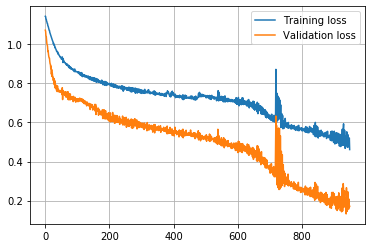

In [263]:
plt.plot(train_losses[50:], label='Training loss')
plt.plot(val_losses[50:], label='Validation loss')
plt.grid()
plt.legend()

In [255]:
print("Predicted Values:\n")
with torch.no_grad():
    for i in range(10):
        m = model(train_batch[0][i])
        print(round(m.item()))
        
df2.head(10)

Predicted Values:

4
5
6
5
4
4
5
4
5
5


,Fixed_acidity,Volatile_acidity,Citric_acid,Residual_sugar,Chlorides,Free_sulfur_dioxide,Total_sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5
7,7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7
8,7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5


In [268]:
correct=0
i=0
res=[]
with torch.no_grad():
    for batch in test_batch :
        for j in range(len(batch)):
            x = model(batch[j])
            #print(round(x.item()))
            res.append(round(x.item()))

true_labels= list(test["Quality"])

for i in range(len(res)):
    if res[i]==int(true_labels[i]):
        correct+=1
        
print("Accuracy:", correct/len(res))

Accuracy: 0.855


## To Do:
1. ~~Try oversampling to balance the classes.~~
2. ~~Try a larger maodel.~~
3. Improve accuracy (over 90%)